In [2]:
from twython import Twython
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
import pytz as pytz
import re
from datetime import datetime

In [4]:
twitter = Twython("QAOVwpmBmATByF0tyy6DXrPuS",
                 "U2V9F51FsvITw8DU7uOWxb7rAwflWFGQS1BmAK3qWJg5QBw73o",
                 "60739089-j1sccDbox83gKxX3EwgXBkKlwvocWj9i4NmhwZeYW",
                  "YmfpqSUXlCHD3makInX22PFTuDZElCwwUBsQrHbxqxCFJ")

In [5]:
import json

In [6]:
twitter.get_user_timeline(screen_name="mroth78", count=2) #changed count to 2 from 200 for printout purposes

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Tue Mar 01 22:31:22 +0000 2016',
  'entities': {'hashtags': [{'indices': [12, 19], 'text': 'gender'}],
   'symbols': [],
   'urls': [{'display_url': 'sciencenews.org/blog/culture-b…',
     'expanded_url': 'https://www.sciencenews.org/blog/culture-beaker/men%E2%80%99s-voices-dominate-political-ads-voters-listen-women',
     'indices': [110, 133],
     'url': 'https://t.co/cBAHJpmDT8'}],
   'user_mentions': [{'id': 195905173,
     'id_str': '195905173',
     'indices': [29, 45],
     'name': 'WesleyanMediaProject',
     'screen_name': 'wesmediaproject'}]},
  'favorite_count': 1,
  'favorited': False,
  'geo': None,
  'id': 704796198742433794,
  'id_str': '704796198742433794',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'possibly_sensitive

In [236]:
dates = [""]*200
timeline= twitter.get_user_timeline(screen_name="mroth78", count=200)
for k in range(0, 199):
    dates[k]=timeline[k]['created_at']
dates

['Tue Mar 01 12:32:37 +0000 2016',
 'Mon Feb 29 22:20:09 +0000 2016',
 'Mon Feb 29 22:19:49 +0000 2016',
 'Mon Feb 29 21:01:13 +0000 2016',
 'Mon Feb 29 20:29:56 +0000 2016',
 'Mon Feb 29 20:26:49 +0000 2016',
 'Mon Feb 29 18:08:21 +0000 2016',
 'Mon Feb 29 18:07:12 +0000 2016',
 'Mon Feb 29 17:00:28 +0000 2016',
 'Sun Feb 28 21:43:54 +0000 2016',
 'Sun Feb 28 15:27:59 +0000 2016',
 'Sun Feb 28 15:17:44 +0000 2016',
 'Sun Feb 28 15:12:41 +0000 2016',
 'Sun Feb 28 12:57:53 +0000 2016',
 'Sun Feb 28 12:56:28 +0000 2016',
 'Sun Feb 28 02:15:20 +0000 2016',
 'Sun Feb 28 02:13:55 +0000 2016',
 'Sat Feb 27 20:57:20 +0000 2016',
 'Sat Feb 27 19:38:56 +0000 2016',
 'Sat Feb 27 03:07:40 +0000 2016',
 'Fri Feb 26 21:17:29 +0000 2016',
 'Fri Feb 26 19:25:25 +0000 2016',
 'Fri Feb 26 17:53:12 +0000 2016',
 'Fri Feb 26 17:46:43 +0000 2016',
 'Fri Feb 26 17:36:06 +0000 2016',
 'Fri Feb 26 17:28:32 +0000 2016',
 'Fri Feb 26 17:18:00 +0000 2016',
 'Fri Feb 26 17:10:55 +0000 2016',
 'Fri Feb 26 13:34:4

In [237]:
for k in range(0, 199):
    dates[k]= dates[k][0:19]
    dates[k]=dates[k]+" 2016"
dates

['Tue Mar 01 12:32:37 2016',
 'Mon Feb 29 22:20:09 2016',
 'Mon Feb 29 22:19:49 2016',
 'Mon Feb 29 21:01:13 2016',
 'Mon Feb 29 20:29:56 2016',
 'Mon Feb 29 20:26:49 2016',
 'Mon Feb 29 18:08:21 2016',
 'Mon Feb 29 18:07:12 2016',
 'Mon Feb 29 17:00:28 2016',
 'Sun Feb 28 21:43:54 2016',
 'Sun Feb 28 15:27:59 2016',
 'Sun Feb 28 15:17:44 2016',
 'Sun Feb 28 15:12:41 2016',
 'Sun Feb 28 12:57:53 2016',
 'Sun Feb 28 12:56:28 2016',
 'Sun Feb 28 02:15:20 2016',
 'Sun Feb 28 02:13:55 2016',
 'Sat Feb 27 20:57:20 2016',
 'Sat Feb 27 19:38:56 2016',
 'Sat Feb 27 03:07:40 2016',
 'Fri Feb 26 21:17:29 2016',
 'Fri Feb 26 19:25:25 2016',
 'Fri Feb 26 17:53:12 2016',
 'Fri Feb 26 17:46:43 2016',
 'Fri Feb 26 17:36:06 2016',
 'Fri Feb 26 17:28:32 2016',
 'Fri Feb 26 17:18:00 2016',
 'Fri Feb 26 17:10:55 2016',
 'Fri Feb 26 13:34:43 2016',
 'Fri Feb 26 13:11:53 2016',
 'Fri Feb 26 02:15:42 2016',
 'Thu Feb 25 20:04:16 2016',
 'Thu Feb 25 19:52:07 2016',
 'Thu Feb 25 15:19:12 2016',
 'Thu Feb 25 1

In [238]:

times = [""]*200
strf = [""]*200
for k in range(0,199):
    dt = datetime.strptime(dates[k], "%a %b %d %H:%M:%S %Y")
    dt = pytz.timezone('UTC').localize(dt)
    times[k] = dt.astimezone(pytz.timezone('EST'))
    strf[k]=datetime.strftime(times[k],"%H")
strf

['07',
 '17',
 '17',
 '16',
 '15',
 '15',
 '13',
 '13',
 '12',
 '16',
 '10',
 '10',
 '10',
 '07',
 '07',
 '21',
 '21',
 '15',
 '14',
 '22',
 '16',
 '14',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '08',
 '08',
 '21',
 '15',
 '14',
 '10',
 '09',
 '08',
 '07',
 '07',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '14',
 '14',
 '11',
 '11',
 '10',
 '10',
 '10',
 '09',
 '08',
 '19',
 '19',
 '19',
 '19',
 '15',
 '15',
 '15',
 '08',
 '08',
 '21',
 '16',
 '16',
 '16',
 '16',
 '15',
 '15',
 '15',
 '11',
 '08',
 '07',
 '07',
 '07',
 '22',
 '22',
 '22',
 '13',
 '12',
 '12',
 '11',
 '11',
 '11',
 '11',
 '10',
 '10',
 '10',
 '18',
 '16',
 '14',
 '14',
 '14',
 '14',
 '14',
 '13',
 '13',
 '10',
 '10',
 '09',
 '09',
 '09',
 '09',
 '09',
 '21',
 '14',
 '13',
 '10',
 '07',
 '07',
 '17',
 '17',
 '17',
 '17',
 '16',
 '21',
 '21',
 '16',
 '15',
 '01',
 '00',
 '22',
 '22',
 '22',
 '22',
 '22',
 '21',
 '16',
 '16',
 '16',
 '15',
 '14',
 '13',
 '13',
 '13',
 '10',
 '19',
 '19',
 '18',
 '13',
 '12',
 '21',
 '20',

In [239]:
hours = ["00","01","02", "03","04", "05","06", "07","08","09","10","11", "12","13","14","15","16", "17","18","19","20", "21","22", "23"]

In [240]:
occur=[""]*23
for k in range(0, 23):
    occur[k]= strf.count(hours[k])
occur

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 11,
 9,
 11,
 23,
 8,
 14,
 13,
 16,
 18,
 14,
 14,
 13,
 11,
 2,
 11,
 9]

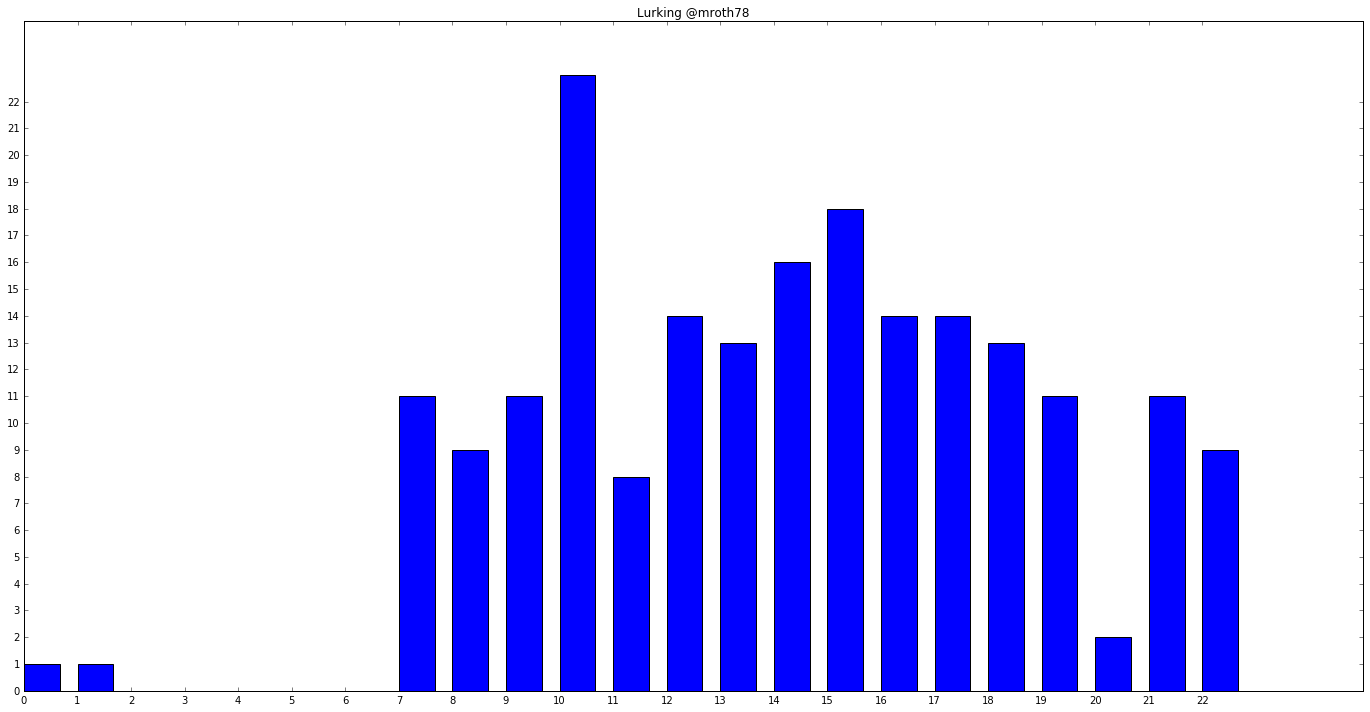

In [242]:
y = occur
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(x), max(x)+1, 1.0))
pylab.rcParams['figure.figsize'] = 24,12